In [1]:
# NO CODE

from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Density ##

Let $f$ be a non-negative function on the real number line and suppose 

$$
\int_{-\infty}^\infty f(x)dx ~ = 1
$$

Then $f$ is a *probability density function* or just *density* for short. 

This integral is the total area under the curve $f$. The condition that it has to be 1 allows us to think of the areas under the curve as probabilities.

As an example, the function $f$ defined by

$$
f(x) = 
\begin{cases}
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \le 0 \\
6x(1-x) ~~~~~ \text{if } 0 < x < 1 \\
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \ge 1 \\
\end{cases}
$$

is a density. It is easy to check by calculus that it integrates to 1. 

Here is a graph of $f$. The density puts all the probability on the unit interval.

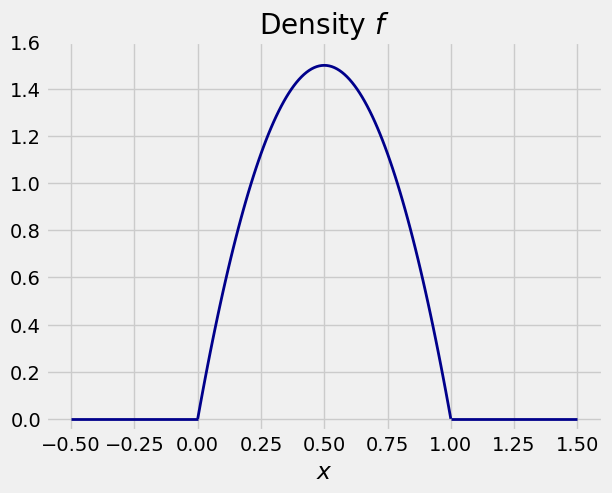

In [2]:
# NO CODE

def f(x):
    return 6*x*(1-x)

x = np.arange(0, 1.01, 0.01)
plt.plot(x, f(x), color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [0, 0], color='darkblue', lw=2)
plt.ylim(-0.05, 1.6)
plt.xlabel('$x$')
plt.title('Density $f$');

### Density is Not the Same as Probability ###
In the example above, $f(0.5) = 6/4 = 1.5 > 1$. Indeed, there are many values of $x$ for which $f(x) > 1$. So the values of $f$ are clearly not probabilities.

Then what are they? We'll get to that later in this section. First we will see that we can work with densities just as we did with the normal curve.

### Areas are Probabilities ###
A random variable $X$ is said to *have density $f$* if for every pair $a < b$,

$$
P(a < X \le b) ~ = ~ \int_a^b f(x)dx
$$

This integral is the area between $a$ and $b$ under the density curve. The graph below shows the area corresponding to $P(0.6 < X \le 0.8)$ for $X$ with the density in our example.

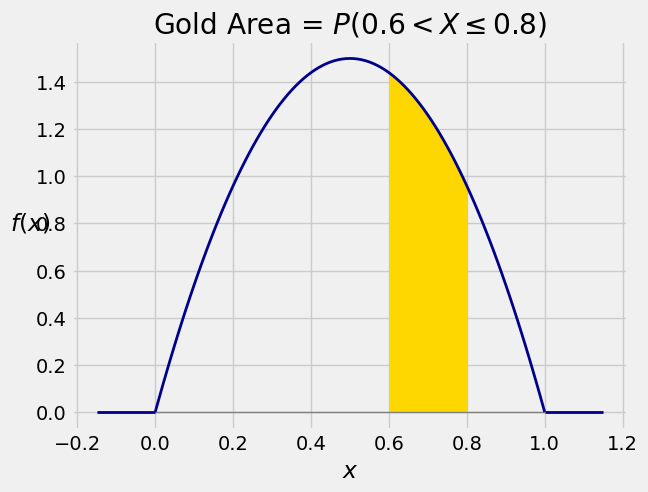

In [3]:
# NO CODE

plt.plot([-0.15, 1.15], [0, 0], color='grey', lw=1)
plt.plot([-0.15, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.15], [0, 0], color='darkblue', lw=2)
plt.plot(x, f(x), color='darkblue', lw=2)
w = np.arange(0.6, 0.801, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.title(r'Gold Area = $P(0.6 < X \leq 0.8)$');

The area is
$$
P(0.6 < X \le 0.8) ~ = ~ \int_{0.6}^{0.8} 6x(1-x)dx
$$

We'll do the integral below.

### Cumulative Distribution Function (CDF) ###
As before, the cdf of $X$ is the function $F$ defined by
$F(x) = P(X \le x)$, but now the probability is computed as an integral instead of a sum.

$$
F(x) ~ = ~ P(X \le x) ~ = ~ \int_{-\infty}^x f(s)ds
$$


In our example, the density is positive only between 0 and 1, so $F(x) = 0$ for $x \le 0$ and $F(x) = 1$ for $x \ge 1$.
For $x \in (0, 1)$,

$$
\begin{align*}
F(x) ~ &= ~ \int_0^x 6s(1-s)ds \\
&= ~ 6\int_0^x sds ~ - ~  6\int_0^x s^2ds \\
&= ~ 3x^2 - 2x^3
\end{align*}
$$

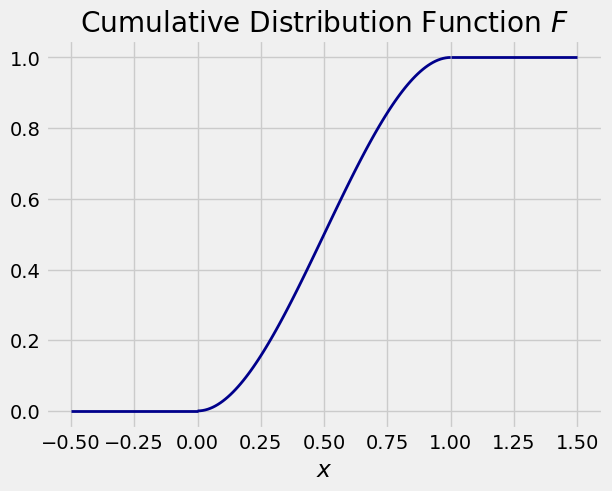

In [4]:
# NO CODE

def F(x):
    return 3*x**2 - 2*x**3

x = np.arange(0, 1.01, 0.01)
plt.plot(x, F(x), color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [1, 1], color='darkblue', lw=2)
plt.ylim(-0.05, 1.05)
plt.xlabel('$x$')
plt.title('Cumulative Distribution Function $F$');

In terms of the graph of the density, $F(x)$ is all the area to the left of $x$ under the density curve. The graph below shows the area corresponding to $F(0.8)$.

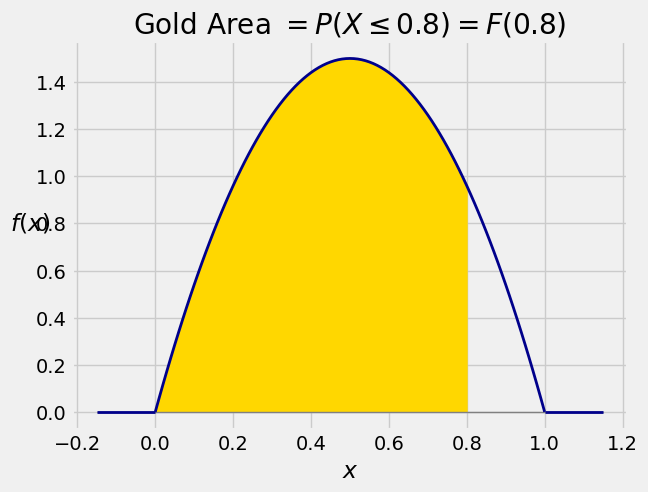

In [5]:
# NO CODE

plt.plot([-0.15, 1.15], [0, 0], color='grey', lw=1)
plt.plot([-0.15, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.15], [0, 0], color='darkblue', lw=2)
plt.plot(x, f(x), color='darkblue', lw=2)
w = np.arange(0, 0.801, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.title(r'Gold Area $= P(X \leq 0.8) = F(0.8)$');

$$
P(X \le 0.8) ~ = ~  F(0.8) ~ = ~ 3\cdot0.8^2 - 2\cdot0.8^3 ~ = ~ 0.896
$$

As before, the cdf can be used to find probabilities of intervals. For every pair $a < b$,

$$
P(a < X \le b) ~ = ~ F(b) - F(a) 
$$

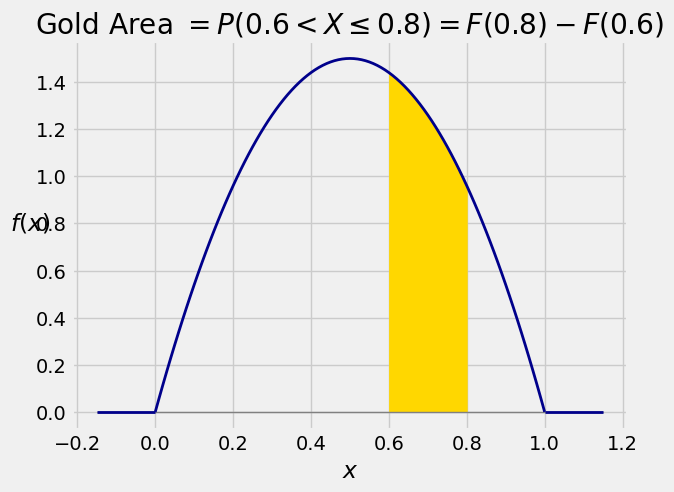

In [6]:
# NO CODE

plt.plot([-0.15, 1.15], [0, 0], color='grey', lw=1)
plt.plot([-0.15, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.15], [0, 0], color='darkblue', lw=2)
plt.plot(x, f(x), color='darkblue', lw=2)
#w = np.arange(0, 0.601, 0.01)
#plt.fill_between(w, f(w), color='darkblue')
w = np.arange(0.6, 0.801, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.title(r'Gold Area $= P(0.6 < X \leq 0.8) = F(0.8) - F(0.6)$');

\begin{align*}
F(0.6) ~ &= ~ 3\cdot0.6^2 - 2\cdot0.6^3 ~ = ~ 0.648 \\
F(0.8) - F(0.6) ~ &= ~ 0.896 - 0.648 ~ = ~ 0.248
\end{align*}

You can get the same answer by integrating the density between 0.6 and 0.8.

By the Fundamental Theorem of Calculus, the density and cdf can be derived from each other:

$$
F(x) = \int_{-\infty}^x f(s)ds ~~~~~~~~~~~~~~~~~~ f(x) = \frac{d}{dx}F(x)
$$

You can use whichever of the two functions is more convenient in a particular application.

### No Probability at Any Single Point ###
A wonderful aspect of a random variable that has a density, like the random variable $X$ above, is that there is no chance of hitting a possible value exactly. That is, for each $x$, we have $P(X = x) = 0$. It's because probabilities are areas under the density curve, and the area of a line is 0.

This is the analog of the fact that each point on the number line has length 0, but intervals still have positive length.

This makes calculations easier, because including or excluding single points in events won't change the probability. For example,

$$
\begin{align*}
P(0.6 < X \le 0.8) ~ &= ~ P(0.6 \le X \le 0.8) \\
&= ~ P(0.6 \le X < 0.8) \\
&= ~ P(0.6 < X < 0.8)
\end{align*}
$$

### The Meaning of Density ###

While $P(X = x) = 0$ for each $x$, the chance that $X$ is in a tiny interval near $x$ is positive if $f(x) > 0$.

The gold strip in the figure below is $P(X \in (x, x+\Delta x))$ for a very small width $\Delta x$. The shape of the strip is essentially a rectangle with height $f(x)$ and with $\Delta x$. So when $\Delta x$ is tiny,

$$
P(X \in (x, x+\Delta x)) ~ \approx ~ f(x)\Delta x
$$

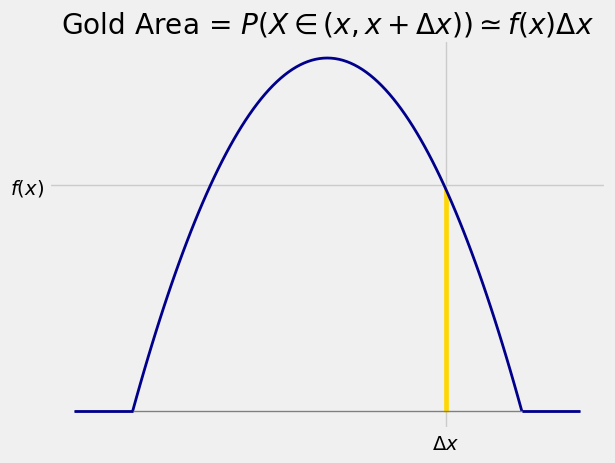

In [7]:
# NO CODE

plt.plot(x, f(x), color='darkblue', lw=2)
plt.plot([-0.15, 1.15], [0, 0], color='grey', lw=1)
plt.plot([-0.15, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.15], [0, 0], color='darkblue', lw=2)
f_08 = f(0.8)
w = np.arange(0.8, 0.805+0.005, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xticks([0.8+0.005], [r'$\Delta x$'])
plt.yticks([f_08], ['$f(x)$'])
plt.title(r'Gold Area = $P(X \in (x, x+\Delta x)) \simeq f(x)\Delta x$');

Thus 

$$
f(x) ~ \approx ~ \frac{P(X \in (x, x+\Delta x))}{\Delta x}
$$

In other words, $f$ measures the chance that $X$ is in a tiny interval near $x$, *relative to the width of the interval*.

Let the width $\Delta x$ get tinier and tinier. In the limit as $\Delta x$ goes to 0, $f$ measures *probability per unit length*. That is why $f$ is called a *probability density* function.

Recall from Data 8 that in a discrete histogram, areas represent percents, and the height of the bar over a bin is given by

$$
\text{height of bar} ~ = ~ \frac{\text{percent in bin}}{\text{width of bin}}
$$

Probability density is the idealization of this as the amount of data goes becomes infinitely large and the width of each bin becomes infinitesimally small.

### Analogous Calculations ###

Many calculations involving densities are direct analogs of calculations for discrete random variables.

For example, if $X$ has density $f$, then for constants $a < b$ we have

$$
P(a \le X \le b) ~ = ~ \int_a^b f(x)dx
$$

If instead $X$ is an integer-valued random variable, then for integers $a < b$ we have

$$
P(a \le X \le b) ~ = ~ \sum_{x=a}^b P(X=x)
$$

In the next section we will develop the analogs for calculating expectation and variance.